Homework 4: Sentiment Analysis - Task 2
----

Names 
----
Names: __Arinjay Singh, Kaan Tural__

Task 2: Train a Naive Bayes Model (30 points)
----

Using `nltk`'s `NaiveBayesClassifier` class, train a Naive Bayes classifier using a Bag of Words as features.
https://www.nltk.org/_modules/nltk/classify/naivebayes.html 

Naive Bayes classifiers use Bayes’ theorem for predictions. Naive Bayes can be a good baseline for NLP applications in particular. You can use it as a baseline for your project!

In [2]:
# our utility functions
# RESTART your jupyter notebook kernel if you make changes to this file
import sentiment_utils as sutils

# nltk for Naive Bayes and metrics
import nltk
import nltk.classify.util
from nltk.metrics.scores import (precision, recall, f_measure, accuracy)
from nltk.classify import NaiveBayesClassifier

# some potentially helpful data structures from collections
from collections import defaultdict, Counter

# so that we can make plots
import matplotlib.pyplot as plt
# if you want to use seaborn to make plots
#import seaborn as sns

[nltk_data] Downloading package punkt to /Users/arinjay/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# define constants for the files we are using
TRAIN_FILE = "movie_reviews_train.txt"
DEV_FILE = "movie_reviews_dev.txt"

In [4]:
# load in your data and make sure you understand the format
# Do not print out too much so as to impede readability of your notebook
train_tups = sutils.generate_tuples_from_file(TRAIN_FILE)
dev_tups = sutils.generate_tuples_from_file(DEV_FILE)

trainX, trainY = train_tups
devX, devY = dev_tups

In [5]:
# set up a sentiment classifier using NLTK's NaiveBayesClassifier and 
# a bag of words as features
# take a look at the function in lecture notebook 7 (feel free to copy + paste that function)
# the nltk classifier expects a dictionary of features as input where the key is the feature name
# and the value is the feature value

# need to return a dict to work with the NLTK classifier
# Possible problem for students: evaluate the difference 
# between using binarized features and using counts (non binarized features)
def word_feats(words, binarized=False):
    """
    This function converts a list of words so that they are featurized
    for nltk's format for bag-of-words
    Parameters:
    words - list of words where each element is a single word 
    Returns: dict mapping every word to True
    """
    if binarized:
        return dict([(word, True) for word in words])
    else:
        return dict(Counter(words))


# set up & train a sentiment classifier using NLTK's NaiveBayesClassifier and
# classify the first example in the dev set as an example
# make sure your output is well-labeled
train_set = [(word_feats(x), y) for x, y in zip(trainX, trainY)]
nb_classifier = NaiveBayesClassifier.train(train_set)


# test to make sure that you can train the classifier and use it to classify a new example
dev_example = devX[0]
classification = nb_classifier.classify(word_feats(dev_example))
print("Classification for first element in dev set:", classification)
print("True label for first element in dev set:", devY[0])
print()
new_dev_example = devX[1]
classification = nb_classifier.classify(word_feats(new_dev_example))
print("Classification for second element in dev set:", classification)
print("True label for second element in dev set:", devY[1])


Classification for first element in dev set: 0
True label for first element in dev set: 0

Classification for second element in dev set: 1
True label for second element in dev set: 1


### Multinomial

In [6]:
from sklearn.metrics import f1_score

predictions = [nb_classifier.classify(word_feats(feature)) for feature in devX]
f1_score(devY, predictions)

0.8020833333333334

### Binary

In [7]:
bi_train_set = [(word_feats(x, binarized=True), y) for x, y in zip(trainX, trainY)]
bi_nb_classifier = NaiveBayesClassifier.train(bi_train_set)
bi_predictions = [bi_nb_classifier.classify(word_feats(feature, binarized=True)) for feature in devX]
f1_score(devY, bi_predictions)

0.8061224489795917

Test your model using both a __binarized__ and a __multinomial__ BoW. Use whichever one gives you a better final f1 score on the dev set to produce your graphs.

- f1 score binarized: __0.8020833333333334__
- f1 score multinomial: __0.8061224489795917__

In [8]:
# Using the provided dev set, evaluate your model with precision, recall, and f1 score as well as accuracy
# You may use nltk's implemented `precision`, `recall`, `f_measure`, and `accuracy` functions
# (make sure to look at the documentation for these functions!)
# you will be creating a similar graph for logistic regression and neural nets, so make sure
# you use functions wisely so that you do not have excessive repeated code
# write any helper functions you need in sentiment_utils.py (functions that you'll use in your other notebooks as well)


# create a graph of your classifier's performance on the dev set as a function of the amount of training data
# the x-axis should be the amount of training data (as a percentage of the total training data)
# NOTE : make sure one of your experiments uses 10% of the data, you will need this to answer the first question in task 5
# the y-axis should be the performance of the classifier on the dev set
# the graph should have 4 lines, one for each of precision, recall, f1, and accuracy
# the graph should have a legend, title, and axis labels



F1 Score @ 10%: 0.3636363636363636


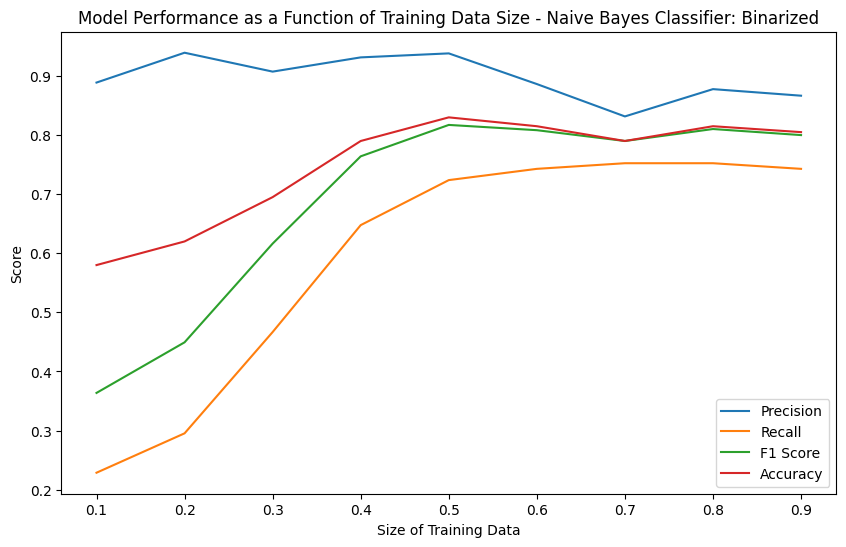

F1 Score @ 10%: 0.3636363636363636


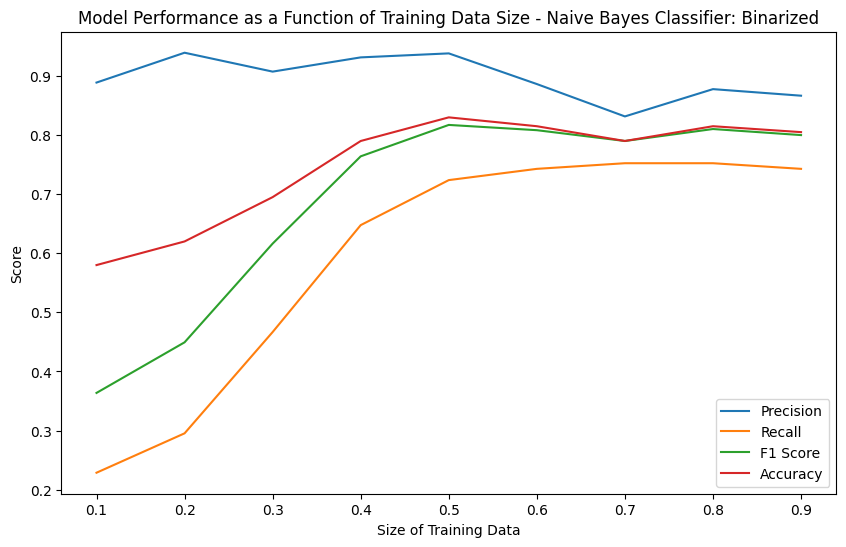

F1 Score @ 10%: 0.3636363636363636


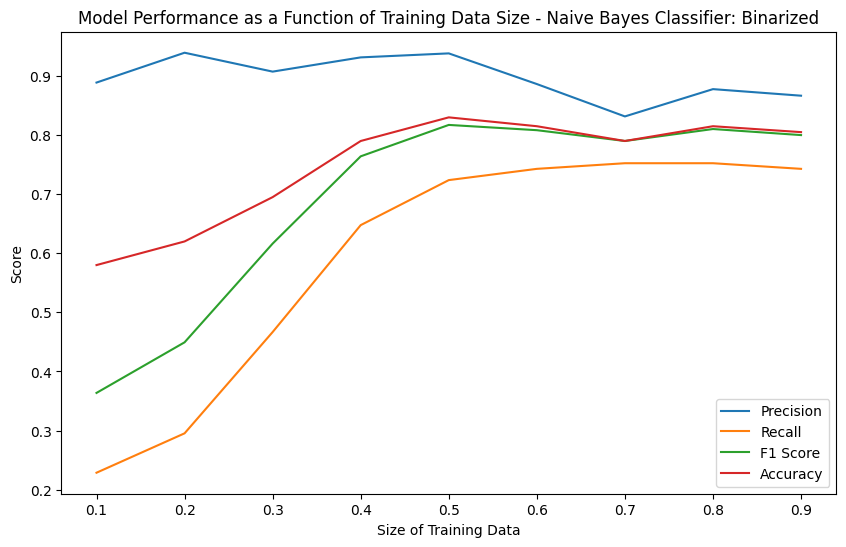

In [9]:
import numpy as np

for i in range(1, 4):
    train_sizes = np.linspace(0.1, 0.9, 9)
    metrics = list()

    for train_size in train_sizes:  
        X_train = trainX[:int(len(trainX) * train_size)]
        y_train = trainY[:int(len(trainY) * train_size)]
        bi_train_set = [(word_feats(x, binarized=True), y) for x, y in zip(X_train, y_train)]
        bi_nb_classifier = NaiveBayesClassifier.train(bi_train_set)
        bi_predictions = [bi_nb_classifier.classify(word_feats(feature, binarized=True)) for feature in devX]
        current_metrics = sutils.get_prfa(devY, bi_predictions)
        metrics.append(current_metrics)
        
        if train_size == 0.1:
            print("F1 Score @ 10%:", current_metrics[2])
    
    sutils.create_training_graph(train_sizes, metrics, "Naive Bayes Classifier: Binarized", f"NB_graph_{i}.png")
